## Simple neural network

Here we construct a non-linear model for binary classification. 

To begin lets imagine a neural network with a single hidden layer with $N$ neurons. Then, input $X$ is first transformed as:

$$
X^{hidden}_{ik} = \sigma(X_{ij}W^{hidden}_{jk} + b^{hidden}_k),
$$
$$
\hat y_{i} = \sigma(X^{hidden}_{ij}W_{j} + b).
$$

After this, $X^{hidden}_{ik}$ can be considered as an input to a logistic regression model. The bonus is that we performed non-linear transformation of our original coordinates and can now catch non-linear decision boundary (as is the case for our mock data).

Note also, that $X$ has shape $(N, 2)$ (where $N$ is number of training examples), $W^{hidden}_{jk}$ has shape of $(2, N^{hidden})$ and $b^{hidden}_k$ has shape $(N^{hidden})$. At the same time, $W$ has shape $(N^{hidden},)$ and $b$ is a scalar (the same way it was for logistic regression). This model can be considered as a logistic regression on transformed coordinates, but we learn the transformation itself.

We could add multiple hidden layers, but for our purpose one is enough.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn import datasets

### Lets create some artificial data

In [2]:
X, y = datasets.make_moons(1000, noise=.25)

In [3]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

### Now lets create a Neural Network from scratch

In [4]:
N_LAYERS = 2
N_HIDDEN = (Xt.shape[1], 16,  1)

In [5]:
weights = []
biases = []

for i in range(N_LAYERS):
    # Initialize w and b for layer i with number of "neurons" of N_HIDDEN[i]
    w =  torch.randn(N_HIDDEN[i], N_HIDDEN[i+1], requires_grad=True)
    b = torch.randn(N_HIDDEN[i+1], requires_grad=True)
    weights.append(w)
    biases.append(b)

In [6]:
def sigmoid(a):
    """Sigmoid activation function."""
    return 1/(1 + (-a).exp())

def output(X, weights, biases):
    """Calculate neural network output."""
    for w, b in zip(weights, biases):
        X = sigmoid(torch.mm(X, w) + b)
    return X

def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

#### Hyper parameters of the model
We can play around with the parameters, but the ones below have proven pretty effective

In [7]:
EPOCHS = 20000
LR = .1
DELTA = 0.000001

#### We now train our model

In [8]:
loss_history = []
for i in range(EPOCHS):
    y_pred = output(Xt, weights, biases)
    loss = logloss(yt, y_pred)
    loss.backward()
    
    loss_history.append(loss.item())

    with torch.no_grad():
        for w, b in zip(weights, biases):
            w.sub_(LR * w.grad)
            b.sub_(LR * b.grad)

    # wipe out all gradients
    for w, b in zip(weights, biases):
        w.grad.zero_()
        b.grad.zero_()
        
    if i % 1000 == 0:
        print(f"Epoch {i}: loss = {loss_history[-1]}")
    
    try:
        if loss_history[-2] - loss_history[-1] < DELTA:
            break
    except:
        # for the first two rounds we add this except
        pass
    
print(loss_history[-1])

Epoch 0: loss = 2.219534158706665
Epoch 1000: loss = 0.2904660403728485
Epoch 2000: loss = 0.26734963059425354
Epoch 3000: loss = 0.24381111562252045
Epoch 4000: loss = 0.22257386147975922
Epoch 5000: loss = 0.20550063252449036
Epoch 6000: loss = 0.19240868091583252
Epoch 7000: loss = 0.1824755072593689
Epoch 8000: loss = 0.17489579319953918
Epoch 9000: loss = 0.16903987526893616
Epoch 10000: loss = 0.16444829106330872
Epoch 11000: loss = 0.16079357266426086
Epoch 12000: loss = 0.15784311294555664
Epoch 13000: loss = 0.15543067455291748
Epoch 14000: loss = 0.15343593060970306
Epoch 15000: loss = 0.15177001059055328
Epoch 16000: loss = 0.15036611258983612
Epoch 17000: loss = 0.14917303621768951
0.14882376790046692


### And visualize the results

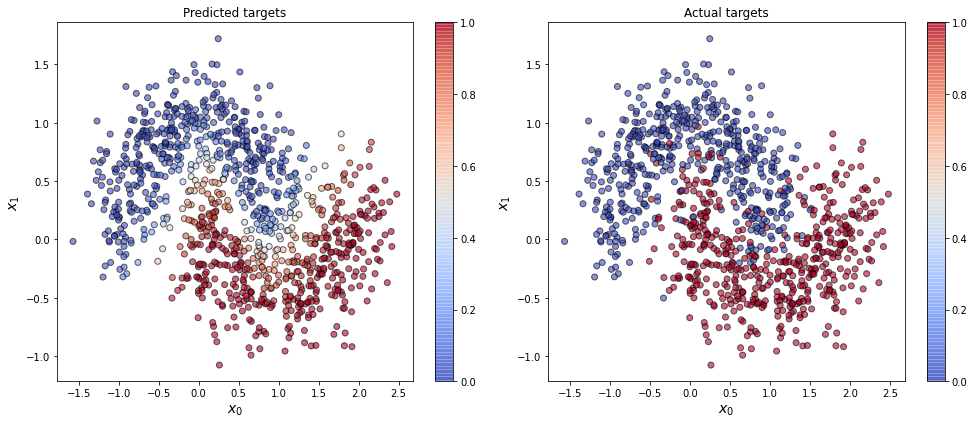

In [9]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

#### Nice! All in all looks like the model succeeded in differenciating the data well.